In [77]:
import pandas as pd
import pathlib
import scipy.sparse as sparse
import requests
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [79]:
def calculate_cohr(words):
    url = "http://palmetto.demos.dice-research.org/service/npmi?words="
    data = {"words": words}
    
    response = requests.post(url, data=data)
    
    if response.status_code == 200:
        return float(response.text)
    else:
        print("Error:", response.status_code, response.text)
        return None

def parallel_calculate_cohr(topic_keys, max_workers=4):
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(calculate_cohr, topic_keys))
    return results

In [80]:
path_models = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/LDA/passage")

In [81]:
models = [dir.name for dir in path_models.iterdir() if dir.is_dir()]

In [82]:
models

['rosie_lg_lda_1_100',
 'rosie_lg_lda_1_300',
 'rosie_lg_lda_1_200',
 'rosie_lg_lda_1_50',
 'rosie_lg_lda_1_500',
 'rosie_lg_lda_1_400',
 'rosie_lg_lda_1_20']

### Models EN

In [83]:
df = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/topic_modeling/cohrs_disp_en.csv")
df = df.sort_values(
    by="Num_Topics",
)
df

,Model,Num_Topics,Dispersion,Average_Coherence
6,rosie_lg_lda_1_20,20,23.147275,0.061253
3,rosie_lg_lda_1_50,50,8.962958,0.062880
0,rosie_lg_lda_1_100,100,3.892811,0.056239
2,rosie_lg_lda_1_200,200,1.932167,0.055182
1,rosie_lg_lda_1_300,300,1.267302,0.056743
5,rosie_lg_lda_1_400,400,0.967599,0.050271
4,rosie_lg_lda_1_500,500,0.785039,0.048833


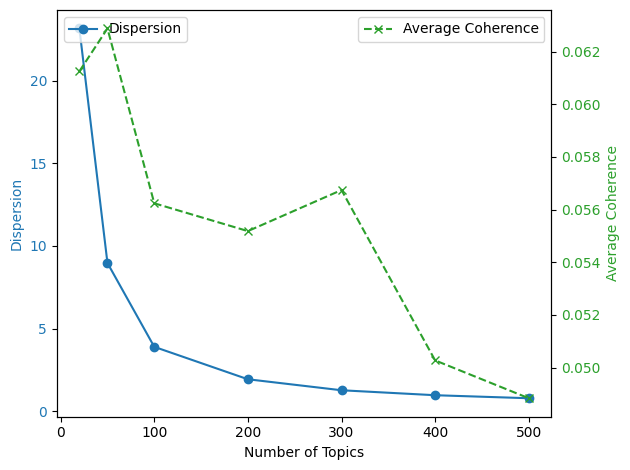

In [84]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Dispersion', color=color)
ax1.plot(df['Num_Topics'], df['Dispersion'], color=color, marker='o', label='Dispersion')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Coherence', color=color)
ax2.plot(df['Num_Topics'], df['Average_Coherence'], color=color, marker='x', linestyle='--', label='Average Coherence')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [85]:
model_name = "lda_rosie_1_15"
path_betas = f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/mallet_output/EN/betas.npy"
betas = np.load(path_betas)

path_thetas = f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/mallet_output/EN/thetas.npz"
thetas = sparse.load_npz(path_thetas).toarray()

In [86]:
thetas.shape

(1393097, 15)

In [87]:
def get_doc_top_tpcs(doc_distr, topn=10):
    sorted_tpc_indices = np.argsort(doc_distr)[::-1]
    top = sorted_tpc_indices[:topn].tolist()
    top_weight = [(k, doc_distr[k]) for k in top]
    return top_weight

def get_doc_main_topc(doc_distr):
    sorted_tpc_indices = np.argsort(doc_distr)[::-1]
    top = sorted_tpc_indices[:1][0]
    return top

In [88]:
path_source = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/29_dec/all/df_1.parquet")
df_raw = pd.read_parquet(path_source)

In [89]:
df_raw_en = df_raw[df_raw["doc_id"].str.contains("EN")]

In [90]:
corpus_en_path = pathlib.Path(f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/train_data/corpus_EN.txt")
with open(corpus_en_path) as file:
    lines = file.readlines()
print(lines[0])
corpus_en = [el.strip().split(" 0 ")[1] for el in lines]
ids_en = [el.strip().split(" 0 ")[0].strip() for el in lines]

df_lang = pd.DataFrame(
    {
        "lemmas": corpus_en,
        "doc_id": ids_en,
    }
)

df_lang

EN_607595_99219-9 0 order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family need remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow



,lemmas,doc_id
0,order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family need remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow,EN_607595_99219-9
1,author_affiliations shinyi_wu phd university southern_california rand_corporation los_angeles california paul di capua md master_business administration university california_los angeles_los angeles_california,EN_183633_46512-40
2,review_feb good doctor,EN_854328_122182-27
3,remove morning remove water balloon place syringe colored balloon port let water fill syringe water drain syringe pull syringe stopper water insert night syringe pull foley continue normal cathing schedule wash foley_catheter warm_soapy water rinse lay information technology clean_towel dry later,EN_1361170_297168-6
4,risk factor child diagnose mis_c age year old case report child age case happen old kid baby,EN_1091308_196292-20
...,...,...
1393092,overview photograph presence tumor vertebrae tumor dense white red interior bone,EN_1292789_287135-0
1393093,pain bad day esi information technology begin improve epidural_steroid injection start work day pain_relief day long,EN_771214_115470-28
1393094,ask weaver parent promote healthy body image child emphasize concept health size let child know healthy normal body shape size say exercise eat eat hungry stop right thing promote health say focus body body look compliment child appearance highlight strength speed power body function form basic look body school day soccer practice drama_club information technology great feed body way information technology suppose feed accomplish explain weight_gain grow_tall child complain change weight shape school age year adolescence remind put weight grow_tall kid grow accordion point information technology good child parent remember adult look different child adolescent additional need physical development want child bone muscle organ density brain tissue healthy,EN_595076_97282-3
1393095,choi_peter s meyerson_matthew targeted genomic_rearrangement crispr_cas technology nature_communications apr,EN_629755_104139-9


In [91]:
df_en = df_raw_en.merge(df_lang, how="inner", on="doc_id")

In [92]:
df_en["thetas"] = list(thetas)
df_en["main_topic"] = df_en["thetas"].apply(get_doc_main_topc)

In [93]:
documents_texts = df_en["lemmas_x"].apply(lambda x: x.split()).tolist()

ntopics = betas.shape[0]
size_vocab = betas.shape[1]
betas_ds = np.copy(betas)
if np.min(betas_ds) < 1e-12:
    betas_ds += 1e-12
deno = np.reshape((sum(np.log(betas_ds)) / ntopics), (size_vocab, 1))
deno = np.ones((ntopics, 1)).dot(deno.T)
betas_ds = betas_ds * (np.log(betas_ds) - deno)

# get weight of each word as maximum 
betas_word = np.max(betas, axis=0)
betas_word_ds = np.max(betas_ds, axis=0)

vocab_w2id = {}
vocab_id2w = {}
path_vocab = f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/mallet_output/ES/vocab_freq.txt"

with open(path_vocab) as file:
    for i, line in enumerate(file):
        # Strip leading and trailing whitespace
        stripped_line = line.strip()
        # Split the line into words and numbers
        parts = stripped_line.split()
        if parts:
            # Get the word (first part)
            wd = parts[0]
            # Populate the dictionaries
            vocab_w2id[wd] = i
            vocab_id2w[str(i)] = wd
####
# SCORE
####

D = len(thetas)
doc_score = np.zeros((D, 1))

for doc in range(D):
    wd_ids = [vocab_w2id[word] for word in documents_texts[doc] if word in vocab_w2id]
    words_not_in_vocab = [word for word in documents_texts[doc] if word not in vocab_w2id]

    # try to split by '_' words in words_not_in_vocab
    additional_words = []
    for word in words_not_in_vocab:
        if "_" in word:
            additional_words += word.split("_")
            words_not_in_vocab.remove(word)
    wd_ids += [vocab_w2id[word] for word in additional_words if word in vocab_w2id]

    words_not_in_vocab = list(set(words_not_in_vocab))

    if len(words_not_in_vocab) >= 1:
        penalization = 1/len(words_not_in_vocab)
    else:
        penalization = 1

    #print("DOCUMENT: ", documents_texts[doc])
    #print("WORDS NOT IN VOCAB: ", words_not_in_vocab)
    
    # Skip documents with no valid words
    if len(wd_ids) <= 1:
        doc_score[doc] = 0  # Or any default score for empty documents
        continue

    #print("BETAS WORD: ", betas_word[wd_ids])
    #print("PENALIZATION: ", penalization)

    #denominator = len(wd_ids) #np.log(len(wd_ids) + 1e-10)  # Small epsilon to prevent log(0)
    denominator = len(list(set(wd_ids))) #np.log(len(wd_ids) + 1e-10)  # Small epsilon to prevent log(0)
    #print("DENOM: ", denominator)
    #weights = [betas_word_ds[wd_id] * get_tfidf_value(vocab_id2w[str(wd_id)], doc) for wd_id in wd_ids]
    doc_score[doc] = (np.sum(betas_word_ds[wd_ids]) *  penalization)/ denominator
    #doc_score[doc] = (np.sum(weights) *  penalization)/ denominator
    #print("DOC SCORE: ", doc_score[doc])

    #import pdb; pdb.set_trace()

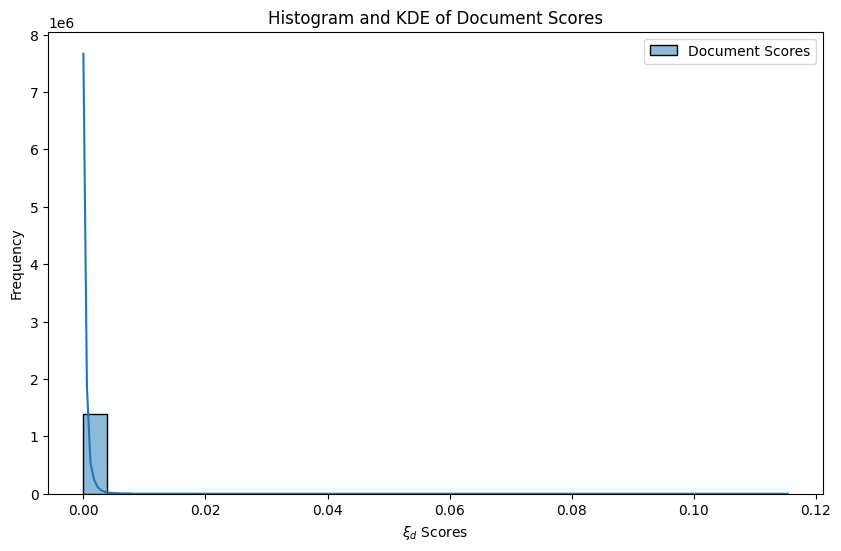

Mean (μ): 0.000
Standard Deviation (σ): 0.001
Threshold (μ - σ): -0.000
Threshold (10th Percentile): 0.000
Number of irrelevant documents (μ - σ): 0
Number of irrelevant documents (10th Percentile): 139310


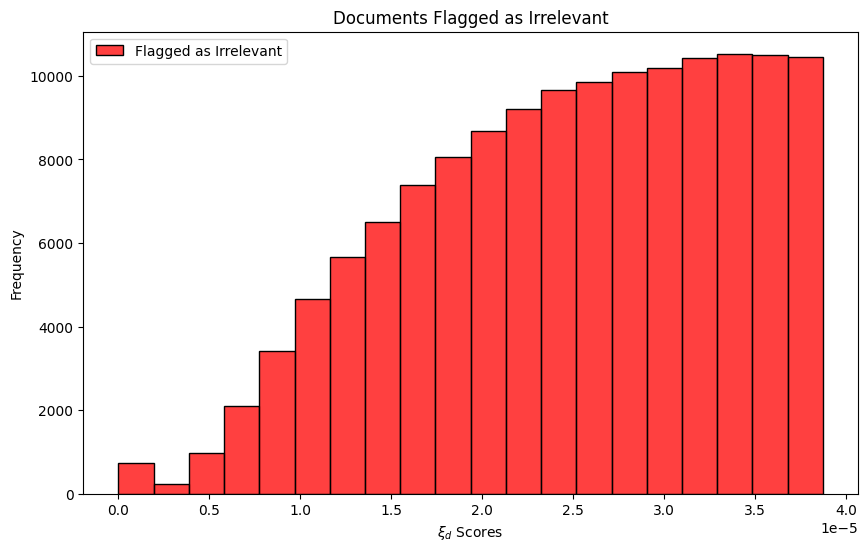

In [94]:
# KDE of the scores
document_scores = doc_score
plt.figure(figsize=(10, 6))
sns.histplot(doc_score, kde=True, bins=30, color='blue', label='Document Scores')
plt.title('Histogram and KDE of Document Scores')
plt.xlabel('$\\xi_d$ Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Set a tentative threshold
mean_score = np.mean(document_scores)
std_score = np.std(document_scores)
threshold_mu_sigma = mean_score - std_score
threshold_percentile = np.percentile(document_scores, 10)

print(f"Mean (\u03bc): {mean_score:.3f}")
print(f"Standard Deviation (\u03c3): {std_score:.3f}")
print(f"Threshold (\u03bc - \u03c3): {threshold_mu_sigma:.3f}")
print(f"Threshold (10th Percentile): {threshold_percentile:.3f}")

# Step 4: Identify documents below the thresholds
irrelevant_mu_sigma = document_scores[document_scores < threshold_mu_sigma]
irrelevant_percentile = document_scores[document_scores < threshold_percentile]

print(f"Number of irrelevant documents (\u03bc - \u03c3): {len(irrelevant_mu_sigma)}")
print(f"Number of irrelevant documents (10th Percentile): {len(irrelevant_percentile)}")

# Step 5: Iterate and review (Manual inspection required)
# Example: Plot documents flagged as irrelevant for visual inspection
plt.figure(figsize=(10, 6))
sns.histplot(irrelevant_percentile, kde=False, bins=20, color='red', label='Flagged as Irrelevant')
plt.title('Documents Flagged as Irrelevant')
plt.xlabel('$\\xi_d$ Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [95]:
df_en["doc_score"] = doc_score
labelled = df_en[df_en.doc_score < np.percentile(doc_score,1)]
labelled[["doc_id", "text", "doc_score"]]

,doc_id,text,doc_score
48,EN_1117599_203783-1,"In older people, kyphosis is often due to weakness in the spinal bones that causes them to compress or crack. Other types of kyphosis can appear in infants or teens due to malformation of the spine or wedging of the spinal bones over time.",0.000011
130,EN_912867_151285-1,"On Oct. 23, 2020, he was at only 23 weeks gestation, the edge of viability. He weighed 1 pound, 0.6 ounces at birth.",0.000011
367,EN_1197564_264402-38,"View PubMed Sen A, Callisen HE, Alwardt CM, Larson JS, Lowell AA, Libricz SL, Tarwade P, Patel BM, Ramakrishna H. Adult venovenous extracorporeal membrane oxygenation for severe respiratory failure: Current status and future perspectives. Ann Card Anaesth. 2016 Jan-Mar; 19 (1):97-111 View PubMed Chang JM, Davila VJ, Lanza LA, Ramakrishna H, Fowl RJ, Money SR. Endovascular repair of expanding thoracic aortic aneurysms in high surgical risk patients. Ann Card Anaesth. 2016 Jan-Mar; 19 (1):158-61 View PubMed Knapp KE, Weis RA, Cubillo EI, Chapital AB, Ramakrishna H. Spontaneous, Postpartum Coronary Artery Dissection and Cardiogenic Shock with Extracorporeal Membrane Oxygenation Assisted Recovery in a 30-Year-Old Patient. Case Rep Cardiol. 2016; 2016:1048708 Epub 2016 Mar 24 View PubMed Ramakrishna H, Gutsche JT, Evans AS, Patel PA, Weiner M, Morozowich ST, Gordon EK, Riha H, Shah R, Ghadimi K, Zhou E, Fernadno R, Yoon J, Wakim M, Atchley L, Weiss SJ, Stein E, Silvay G, Augoustides JG. The Year in Cardiothoracic and Vascular Anesthesia: Selected Highlights From 2015. J Cardiothorac Vasc Anesth. 2016 Jan; 30: (1)1-9. View PubMed Ramakrishna H, O'Hare M, Mookadam F, Gutsche JT, Shah R, Augoustides JG. Sudden Cardiac Death and Disorders of the QT Interval: Anesthetic Implications and Focus on Perioperative Management. J Cardiothorac Vasc Anesth. 2015 Dec; 29: (6)1723-33.",0.000006
738,EN_285944_53235-95,"CIB #38 -- Vibration Syndrome Issued: March 29, 1983 (#83-110) NIOSH concludes that vibrating handtools can cause vibration syndrome, a condition also known as vibration white finger and Raynaud's phenomenon of occupational origin. Vibration syndrome has adverse circulatory and neural effects in the fingers. The signs and symptoms of vibration syndrome include numbness, pain, and blanching (turning pale or ashen) of the fingers. Of particular concern is evidence of advanced stages of vibration syndrome after exposures as short as 1 year. NIOSH recommends that jobs be redesigned to minimize the use of vibrating handtools and that power handtools be redesigned to minimize vibration. Approximately 1.2 million U.S. workers are exposed to hand-arm vibration and are potentially at risk of developing vibration syndrome.",0.000010
864,EN_1194672_258814-8,"J Telemed Telecare. 2011; 17(8):417-20. Epub 2011 Nov 03. View PubMed North F, Varkey P, Laing B, Cha SS, Tulledge-Scheitel S. Are e-health web users looking for different symptom information than callers to triage centers? Telemed J E Health. 2011 Jan-Feb; 17 (1):19-24 Epub 2011 Jan 07 View PubMed North F, Muthu A, Varkey P. Differences between surrogate telephone triage calls in an adult population and self calls. J Telemed Telecare. 2011; 17(3):118-22. Epub 2010 Dec 07. View PubMed North F, Varkey P, Bartel GA, Cox DL, Jensen PL, Stroebel RJ. Can an office practice telephonic response meet the needs of a pandemic? Telemed J E Health. 2010 Dec; 16(10):1012-6. Epub 2010 Nov 08. View PubMed North F, Varkey P. Use of the prioritization matrix to enhance triage algorithms in clinical decision support software. Am J Med Qual. 2010 Nov-Dec; 25(6):468-73. Epub 2010 Oct 08. View PubMed Ebbert JO, Croghan IT, North F, Schroeder DR. A pilot study to assess smokeless tobacco use reduction with varenicline. Nicotine Tob Res. 2010 Oct; 12 (10):1037-40 Epub 2010 Aug 19 View PubMed North F, Varkey P. How serious are the symptoms of callers to a telephone triage call centre? J Telemed Telecare. 2010; 16(7):383-8. Epub 2010 Aug 16.",0.00000

In [96]:
labelled[labelled.doc_score == 0][["doc_id", "text", "doc_score"]]

,doc_id,text,doc_score
8776,EN_969366_166318-11,_____I'd like to not get into arguments and regret any of the things I said or did.,0.0
10851,EN_738796_112640-27,"Nada Youssef: So after childbirth, they're not done with you.",0.0
11743,EN_1347916_294540-7,Do gallstones have another name: Cholelithiasis is the name doctors sometimes call gallstones.,0.0
11879,EN_696429_109364-70,"Reviewed on May 9, 2022: I have already recommended Dr. Faltay to otheres!",0.0
15736,EN_1363433_297476-4,4. Ask another smoker to quit with you. You can help each other.,0.0
...,...,...,...
1387552,EN_766447_115024-15,"Reviewed on May 2, 2023: She is wonderful and was very helpful to me!",0.0
1388958,EN_777863_116018-169,Nada Youssef: I was just going to ask you that question.,0.0
1390526,EN_1182156_238324-10,Don't hesitate to ask any other related questions you have.,0.0
1390659,EN_1108918_201135-9,Also wear disposable gloves to immediately wash clothes or linens that might be contaminated.,0.0


In [97]:
"""
seed = 1234
path_save = "annotations_es.csv"
if pathlib.Path(path_save).is_file():
    labelled_sample = pd.read_csv(pathlib.Path(path_save))
    print("here")
else:
    labelled_sample = labelled.sample(n=1000, random_state=seed)
    labelled_sample["label"] = [0] * len(labelled_sample)
    labelled_sample.to_csv(path_save)
"""

'\nseed = 1234\npath_save = "annotations_es.csv"\nif pathlib.Path(path_save).is_file():\n    labelled_sample = pd.read_csv(pathlib.Path(path_save))\n    print("here")\nelse:\n    labelled_sample = labelled.sample(n=1000, random_state=seed)\n    labelled_sample["label"] = [0] * len(labelled_sample)\n    labelled_sample.to_csv(path_save)\n'

In [98]:
seed = 1234
mean_score_bad = np.mean(labelled.doc_score.values.tolist())
print(f"MEAN SCORE BAD: {mean_score_bad}")

path_save = "annotations_en_good.csv"
if pathlib.Path(path_save).is_file():
    good_labelled = pd.read_csv(pathlib.Path(path_save))
else:
    good_labelled = df_en[df_en.doc_score > mean_score_bad].sample(n=1000, random_state=seed)
    good_labelled["label"] = [1] * len(good_labelled)
    good_labelled.to_csv(path_save)

MEAN SCORE BAD: 8.735659258021087e-06


In [99]:
good_labelled[["doc_id", "text", "doc_score"]]

,doc_id,text,doc_score
861009,EN_500950_11598-13,"Vaccination assessments varied by state because of differences in required vaccines and doses, vaccines assessed, methods of data collection, and data reported (Supplementary Table 1, https://stacks.cdc.gov/view/cdc/116354). Kindergartners were considered up to date for a given vaccine if they received all doses of that vaccine required for school entry,*** except in nine states††† that reported kindergartners as up to date for any given vaccine only if they received all doses of all vaccines required for school entry. States were asked to report any COVID-19–related impact on kindergarten vaccination measurement and coverage.",0.000704
335833,EN_1086746_195747-10,"To request records to be sent to someone other than yourself, complete the Authorization to Release Protected Health Information to a Third Party and send it to Mayo Clinic Release of Information. The authorization is available in Arabic, Somali, Hmong and Spanish translations.",0.000226
613306,EN_97960_39737-120,"Although it is not known what level of maternal antibody is protective against infant pertussis, ACIP concluded that the potential benefit of protection from maternal antibodies in newborn infants outweighs the potential risk for shifting pertussis disease burden to later in infancy and emphasized the importance of timely receipt of the fourth DTaP dose (9).",0.000110
585219,EN_1232322_279802-19,"Hannon MJ, Thompson CJ. Vasopressin, diabetes insipidus, and the syndrome of inappropriate antidiuresis. In: Jameson JL, De Groot LJ, de Kretser DM, et al, eds. Endocrinology: Adult and Pediatric. 7th ed. Philadelphia, PA: Elsevier Saunders; 2016:chap 18.",0.000109
1188514,EN_844923_121145-11,What happens during tenotomy: Percutaneous needle tenotomy and open tenotomy are two tenotomy techniques used to treat issues with your tendons.,0.000084
...,...,...,...
1249197,EN_1039399_186145-18,"Pediatric Intensive Care Unit: Our 14-bed Pediatric Intensive Care Unit (PICU) provides monitoring and life-sustaining treatment for critically ill infants, children, and adolescents. Our PICU offers advanced cardiovascular, neurological and respiratory support, including extracorporeal membrane oxygenation (ECMO), which was pioneered at Mass General. All PICU attendings are trained in pediatric critical care medicine, and cardiac patients are followed by a dedicated cardiac intensivist as well as by their pediatric cardiologist. Our pediatric intensive care team is an important aspect in the care of our pediatric cardiac catheterization and heart surgery patients and families.",0.000759
987333,EN_560281_92336-75,"Mark P. Johnson, MD: We actually partially deliver the baby, take a portion of the tumor off that we can, safely. And then put the baby back in the uterus and try to get as many weeks as we can before the mom goes into preterm delivery or ruptures membranes or some other thing occurs that requires us to deliver the baby.",0.000317
579435,EN_775940_115866-20,You’ll likely have a less optimistic prognosis if you have pulmonary hypertension or ventricular aneurysm.,0.000055
582594,EN_810010_119396-5,"Industry Relationships: As of 5/6/2013, Dr. Cloud has reported no financial relationship with industry that is applicable to this listing. In general, patients should feel free to contact their doctor about any of the relationships and how the relationships are overseen by Cleveland Clinic. To learn more about Cleveland Clinic's policies on collaborations with industry and innovation management, go to our Integrity in Innovation page.",0.000222


In [14]:
# Get positions where "label" is 1
#positions = labelled_sample[labelled_sample["label"] == 1].index.tolist()

#print("Positions where label is 1:", positions)

Positions where label is 1: [8, 10, 16, 18, 20, 27, 38, 39, 47, 53, 57, 96, 101, 103, 136, 140, 146, 149, 151, 162, 168, 171, 209, 212, 213, 227, 233, 238, 242, 251, 259, 269, 279, 289, 300, 309, 311, 312, 325, 326, 328, 344, 351, 361, 369, 391, 393, 395, 401]


In [ ]:
seed = 1234
path_save = "annotations_en.csv"
if pathlib.Path(path_save).is_file():
    labelled_sample = pd.read_csv(pathlib.Path(path_save))
else:
    labelled_sample = labelled.sample(n=1000, random_state=seed)
    labelled_sample["label"] = [0] * len(labelled_sample)

start = 780
counter = 0
for id_, row in labelled_sample.iterrows():
    if counter > start:
        print(f"ID: {id_}, counter: {counter}: {row.text}")
        label = input("-- Input label: ")
        labelled_sample.loc[id_, "label"] = int(label)
    
        if counter % 10 == 0:
            labelled_sample.to_csv(path_save)
    counter +=1

ID: 781, counter: 781: Barger L, Ayas N, Cade B, Cronin J, Rosner B, Speizer F, Czeisler C [2006]. Impact of extended-duration shifts on medical errors, adverse events, and attentional failuresexternal icon. PLoS Med 3:e487. [http://www.plosmedicine.org/article/info:doi/10.1371/journal.pmed.0030487]. Accessed on: July 26, 2012.


-- Input label:  0


ID: 782, counter: 782: Levin ME, O'Neal LW, eds. The diabetic foot. 4th ed. St. Louis: CV Mosby, 1988.


-- Input label:  0


ID: 783, counter: 783: 2012: Naderi S, Barnett B, Hoffman RS, Dalipi R, Houdek L, Alagappan K, Silverman R. : Factors associated with failure to follow-up at a medical clinic after an emergency department visit Am J Emerg Med 30(2): 347-51, February 2012.


-- Input label:  0


ID: 784, counter: 784: We cannot do this without help from donors like you. There are many ways to give.


-- Input label:  0


ID: 785, counter: 785: Sometimes a dense or dark floater will interfere with reading.


-- Input label:  0


ID: 786, counter: 786: Bursitis of the heel is swelling of the fluid-filled sac (bursa) at the back of the heel bone.


-- Input label:  1


ID: 787, counter: 787: Is a continuous glucose monitor the same as an insulin pump: No, CGM devices and insulin pumps are not the same.


-- Input label:  1


ID: 788, counter: 788: A synthetic version of DHEA is available as a tablet, capsule, powder, topical cream and gel.


-- Input label:  1


ID: 789, counter: 789: There are two types of freckles: ephelides and solar lentigines.


-- Input label:  1


ID: 790, counter: 790: You can have one or more types of incontinence. Each type may have a different cause.


-- Input label:  1


ID: 791, counter: 791: Dietitian's tip: Instead of salt, top pretzels with sesame seeds, poppy seeds or sunflower seeds for flavor and crunch.


-- Input label:  0


ID: 792, counter: 792: Sarah Kowitt, MPH; Briana Woods-Jaeger, PhD; Jesse Lomas; Tamara Taggart, MPH; Linden Thayer; Sussie Sutton, MSA; Alexandra F. Lightfoot, EdD: Suggested citation for this article: Kowitt S, Woods-Jaeger B, Lomas J, Taggart T, Thayer L, Sutton S, et al. Using Photovoice to Understand Barriers to and Facilitators of Cardiovascular Health Among African American Adults and Adolescents, North Carolina, 2011–2012. Prev Chronic Dis 2015;12:150062. DOI: http://dx.doi.org/10.5888/pcd12.150062external icon.


-- Input label:  0


ID: 793, counter: 793: Ehrlich PF, Ritchey ML, Hamilton TE, Haase GM, Ou S, Breslow N, Grundy P, Green D, Noorkol P, Becker J, Shamberger RC. Quality assessment for Wilms’ tumor: a report from the National Wilms’ Tumor Study-5. J Pediatr Surg. 2005;40:208-12; discussion 212-3.


-- Input label:  0


ID: 794, counter: 794: 2009: Sanchez PV, Perry RL, Sarry JE, Perl AE, Murphy K, Swider CR, Bagg A, Choi JK, Biegel JA, Danet-Desnoyers G, Carroll M. A robust xenotransplantation model for acute myeloid leukemia. Leukemia. 2009; 23(11): 2109-17.


-- Input label:  0


ID: 795, counter: 795: Spafford PS, Sinkin RA, Cox C, Reubens L, Powell KR. Prevention of central venous catheter-related coagulase-negative staphylococcal sepsis in neonates. J Pediatr 1994;125:259-63.


-- Input label:  0


ID: 796, counter: 796: Reynes J-M, Counor D, Ong S, et al. Nipah virus in Lyle’s Flying Foxes, Cambodia. Emerging Infectious Disease 2005;11(7):1042-7.


-- Input label:  0


ID: 797, counter: 797: Remington G, Hoffman BF. Gas sniffing as a form of substance abuse. Can J Psychiatry 1984;29:31-5.


-- Input label:  0


ID: 798, counter: 798: After Your Transfer: Watchful Waiting: After the embryo transfer, controlled ovarian hyperstimulation, or IUI cycle, you may be given a progesterone supplement that helps support the uterine lining and encourage the embryos to implant. For many natural cryothaw cycles, controlled ovarian hyperstimulation and IUI cycles, progesterone is not indicated.


-- Input label:  1


ID: 799, counter: 799: Serious Illness Conversation Guide Teacher Training – Collaborative Curriculum from VitalTalk and Ariadne Labs Serious Illness Care Program Available as a pre-packaged course on VitalTalk backstage at https://vitaltalk.org/resources. 2022. Dans M, Kutner JS, Agarwal R, Baker JN, Bauman JR, Beck AC, Campbell TC, Carey EC, Case AA, Dalal S, Doberman DJ, Epstein AS, Fairman NP, Fecher L, Jones J, Kapo J, Lee RT, Loggers ET, McCammon S, Mitchell W, Ogunseiten AB, Rajasekhara S, Ramachandran K, Sutton L, Temel J, Teply ML, Terauchi SY, Thomas J, Walling AM, Wells-Di-Gregorio S, Zachariah F. Palliative Care (version 1.2022) NCCN Clinical Practice Guidelines in Oncology (NCCN Guidelines), nccn.org. 2022. Chesak SS, Salinas M, Abraham H, Harris CE, Carey EC, Khalsa T, Mauck KF, Feely M, Licatino L, Moeschler S, Bhagra A. Experiences of Gender Inequity Among Women Physicians Across Career Stages: Findings from Participant Focus Groups. Womens Health Rep (New Rochelle). 20

-- Input label:  0


ID: 800, counter: 800: 2012: Böhm J, Biancalana V, Dechene ET, Bitoun M, Pierson CR, Schaefer E, Karasoy H, Dempsey MA, Klein F, Dondaine N, et al. (2012) Mutation spectrum in the large GTPase dynamin 2, and genotype-phenotype correlation in autosomal dominant centronuclear myopathy. Hum Mutat, 33(6):949-59.


-- Input label:  0


ID: 801, counter: 801: Publications Print Yang LT, Lee CC, Su CH, Amano M, Nabeshima Y, Kitano T, Tsai CM, Hung CL, Nakaoku Y, Nishimura K, Ogata S, Lo HY, Hsu RB, Chen YS, Chen WJ, Mankad R, Pellikka PA, Ho YL, Takeuchi M, Izumi C. Analysis of Left Ventricular Indexes and Mortality Among Asian Adults With Hemodynamically Significant Chronic Aortic Regurgitation. JAMA Netw Open. 2023 Mar 1; 6 (3):e234632 Epub 2023 Mar 01 View PubMed Chang HY, Wang CH, Tsai CM, Enriquez-Sarano M, Mankad R, Yang LT. A Story of Two Tales: Behcet Disease Related Severe Aortic Regurgitation and Bacterial Endocarditis Associated Severe Mitral Regurgitation. Acta Cardiol Sin. 2022 Jul; 38 (4):530-531 View PubMed Schmidt T, Mankad R. Assessment of Cardiac Risk in Women with Autoimmune Disease. Curr Cardiol Rep. 2022 Jul; 24 (7):775-784 Epub 2022 May 07 View PubMed Bretzman J, Mankad R. 18-Year-Old Man With Chest Pain. Mayo Clin Proc. 2022 Feb; 97 (2):370-374 View PubMed Vega B, Stockland AH, Bramblet RM, Ander

-- Input label:  0


ID: 802, counter: 802: Swing your pretend jump rope as you hop up and down.


-- Input label:  0


ID: 803, counter: 803: Parham L, Karakasheva T, Klochkova A, Williams P, Ma X, Simon L, Danan C, Boyer B, Whelan K, Hamilton K: "Posttranscriptional Regulation of the Autophagy Pathway in Facultative Stem Cells Contributes to Epithelial Regeneration," Oral Presentation by Colleague. Digestive Disease Week Virtual Conference May 2021.


-- Input label:  0


ID: 804, counter: 804: Frommelt P, Lopez L, Dimas VV, Eidem B, Han BK, Ko HH, Lorber R, Nii M, Printz B, Srivastava S, Valente AM, Cohen MS. Recommendations for Multimodality Assessment of Congenital Coronary Anomalies: A Guide from the American Society of Echocardiography: Developed in Collaboration with the Society for Cardiovascular Angiography and Interventions, Japanese Society of Echocardiography, and Society for Cardiovascular Magnetic Resonance. J Am Soc Echocardiogr. 2020 Mar;33(3):259-294. doi: 10.1016/j.echo.2019.10.011. PMID: 32143778.


-- Input label:  0


ID: 805, counter: 805: 2016 Aug; 46 (2):137-43 Epub 2016 Jan 15 View PubMed Wu G, DeSimone CV, Suddendorf SH, Asirvatham RS, Asirvatham SJ, Huang C, Chen PS, Cha YM. Effects of stepwise denervation of the stellate ganglion: Novel insights from an acute canine study. Heart Rhythm. 2016 Jul; 13 (7):1395-401 Epub 2016 Mar 04 View PubMed Gaba P, DeSimone CV, Henz BD, Friedman PA, Bruce CJ, Holmes DR Jr, Madhavan M, Vasudevan K, Wahnschaffe D, Berhow S, Danielsen AJ, Ladewig DJ, Mikell SB, Johnson SB, Suddendorf SH, Kara T, Worrell GA, Asirvatham SJ. Novel Techniques in Epilepsy Management: Venous Pacing and Capture of Electrical Activity in the Primate Cortex. J Neurol Neurophysiol. 2016 Jun; 7 (3) Epub 2016 May 25 View PubMed El Rafei A, Desimone DC, Sohail MR, Desimone CV, Steckelberg JM, Wilson WR, Baddour LM. Cardiovascular Implantable Electronic Device Infections due to Propionibacterium Species. Pacing Clin Electrophysiol. 2016 Jun; 39 (6):522-30 Epub 2016 Apr 22 View PubMed Okamura 

-- Input label:  0


ID: 806, counter: 806: View the "References" section of this web page for bibliography.


-- Input label:  0


ID: 807, counter: 807: Lichtenberg R, Dries D, Ward K, Marshall W, Scanlon P. Cardiovascular effects of lightning strikes. J Am Coll Cardiol 1993;21:531-6.


-- Input label:  0


ID: 808, counter: 808: Nawa N, Garrison-Desany HM, Kim Y, Ji Y, Hong X, Wang G, Pearson C, Zuckerman BS, Wang X, Surkan PJ. Maternal persistent marijuana use and cigarette smoking are independently associated with shorter gestational age. Paediatr Perinat Epidemiol. 2020 Jun 30. Online ahead of print.


-- Input label:  0


ID: 809, counter: 809: Cryotherapy with liquid nitrogen or Electrodesiccation or electrocautery or Surgical removal.


-- Input label:  0


ID: 810, counter: 810: Suter M, Reinhardt JM, Zabner J, Montague P, Taft P, Lee J, McLennan G. Bronchoscopic imaging of pulmonary mucosal vasculature responses to inflammatory mediators. J Biomed Opt 2005; 10(3):034013.


-- Input label:  0


ID: 811, counter: 811: Magy HI, Work TH, Thomas CV. A reassessment of Culex pipiens as a potential St. Louis encephalitis vector in Imperial County. Proc Pap Annu Conf Calif Mosq Control Assoc 1976;44:41-5.


-- Input label:  0


ID: 812, counter: 812: Resolving the heterogeneous tumor-centric cellular neighborhood through multiplexed, spatial paracrine interactions in the setting of immune checkpoint blockade. Cancer Res Commun. 2022 Feb; 2 (2):78-89 Epub 2022 Feb 10 View PubMed Maus RLG, Leontovich AA, Moore RM, Fogarty Z, Guo R, Davidson TM, Tekin B, Atherton C, Schimke JM, Dicke BA, Chen BJ, Markovic SN. Quantitative spatial evaluation of tumor-immune interactions in the immunotherapy setting of metastatic melanoma lymph nodes. Front Immunol. 2022; 13:1024039 Epub 2022 Dec 05 View PubMed Jiang J, Tekin B, Yuan L, Armasu S, Winham SJ, Goode EL, Liu H, Huang Y, Guo R, Wang C. Computational tumor stroma reaction evaluation led to novel prognosis-associated fibrosis and molecular signature discoveries in high-grade serous ovarian carcinoma. Front Med (Lausanne). 2022; 9:994467 Epub 2022 Sept 07 View PubMed Claxton MR, Dalvin LA, Guo R, Tooley AA. Genetic Alterations in Melanocytoma Associated with Oculodermal M

-- Input label:  0


ID: 813, counter: 813: AT&T MODERATOR: We have a question from Miriam Falco, CNN. Please go ahead.


-- Input label:  0


ID: 814, counter: 814: Dr. Fernando Bula Rudas can be reached at (727) 767-4160. You can also schedule an appointment with Dr. Fernando Bula Rudas online.


-- Input label:  0


ID: 815, counter: 815: Overall, I'd say after you get your score, do what you can.


-- Input label:  0


ID: 816, counter: 816: Horizontal stress is generally more intense in some directions than others, so its effects can be minimized with proper entry orientation. AHSM contains two modules to improve mine layouts for control of horizontal stress. For development, the user specifies the orientations of the entries, the crosscuts, and the maximum horizontal stress. Angled crosscuts may be used, and the angles may be different for the right- and left-hand crosscuts. If site-specific stress measurements are not available, a drop-down menu allows the user to select from a menu of regional stress orientations. AHSM then shows the how the stress condition would vary as the entry and crosscut orientations are changed.


-- Input label:  1


ID: 817, counter: 817: Artenstein MS, Gold R, Zimmerly JG, Wyle FA, Schneider H, Harkins C. Prevention of meningococcal disease by group C polysaccharide vaccine. N Engl J Med 1970;282:417-20.


-- Input label:  0


ID: 818, counter: 818: Davey B, Thacker D, Rychik J : Atrioventricular Valve Regurgitation in the Fetus With Atrioventricular Canal Defect: Transition From Prenatal to Postnatal Life. Pediatr Cardiol May 12 2013 Notes: [Epub ahead of print] PMID: 23666083.


-- Input label:  0


ID: 819, counter: 819: 2018: Kalish JM, Ferrero GB, Mussa A. Lateralized overgrowth – hemihypertrophy and hemihyperplasia. Overgrowth Syndromes. 2018. ed Giovanni Neri, Luigi Boccuto, and Roger Stevenson. Oxford University Press.


-- Input label:  0


ID: 820, counter: 820: Chicken Nuggets: Before using, please refer to our Recipe Disclaimer.


-- Input label:  0


ID: 821, counter: 821: Omid Fathi, MD Contact Information Call us at: (614) 722-4559 Fax us at: (614) 722-4541 PediatricsNeonatology700 Children's DrColumbus, OH 43205 (map) Learn more about Omid Fathi Academic and Clinical Areas Neonatology Physician Team Neonatology Fellowship Faculty Primary Department Pediatrics Primary Section Neonatology Research Publications Logan JW, Bapat R, Ryshen G, Bagwell G, Eisner M, Kielt M, Hanawalt M, Payne K, Alt-Coan A, Tatad M, Krendl D, Jebbia M, Reber KM, Halling C, Osman AA, Bonachea EM, Nelin LD, Fathi O. Use of a quality scorecard to enhance quality and safety in community hospital newborn nurseries. J Pediatr. 2022 Mar 28; Cistone N, Erlenwein D, Bapat R, Ryshen G, Thomas L, Haghnazari MS, Thomas R, Foor N, Fathi O. Quality Improvement Initiative in the NICU for Improved Practice of Cuff Blood Pressure Measurements. Adv Neonatal Care. 2021 Dec 28; Ball MK, Seabrook RB, Bonachea EM, Chen B, Fathi O, Nankervis CA, Osman A, Schlegel AB, Magers J,

-- Input label:  0


ID: 822, counter: 822: Nicoli F, Orfaniotis G, Ciudad P, et al. Correction of cicatricial ectropion using non-ablative fractional laser resurfacing. Lasers Med Sci. 2019;34(1):79-84. PMID: 30056585 pubmed.ncbi.nlm.nih.gov/30056585/.


-- Input label:  0


ID: 823, counter: 823: Diskin SJ, Li M, Hou C, Yang S, Glessner J, Hakonarson H, Bucan M, Maris JM, Wang K.: Adjustment of genomic waves in signal intensities from whole-genome SNP genotyping platforms. Nucleic Acids Res 2008.


-- Input label:  0


ID: 824, counter: 824: Koretz RL, Abbey H, Coleman E, Gitnick G. Non-A, non-B post-transfusion hepatitis: looking back in the second decade. Ann Intern Med 1993;119:110-5.


-- Input label:  0


ID: 825, counter: 825: Kanoh T, Fukuda M, Onozuka H, Kinouchi T, Ohnishi Y. Urinary 1-hydroxypyrene as a marker of exposure to polycyclic aromatic hydrocarbons in environment. Environ Res 1993;62(2):230-241.


-- Input label:  0


ID: 826, counter: 826: Lyons T, Cruz A, Freedman S, Neuman M, Balamuth F, Aronson P, Thomson J, Pruitt C, Shah S, Nigrovic L, for the PEM-CRC HSV Study Group: Cerebrospinal fluid WBC correction in infants with traumatic lumbar punctures. Platform Presentation at the Pediatric Academic Societies Annual Meeting, Baltimore, MD May 2016.


-- Input label:  0


ID: 827, counter: 827: Kalish Jennifer M, Conlin Laura K, Bhatti Tricia R, Dubbs Holly A, Harris Mary Catherine, Izumi Kosuke, Mostoufi-Moab Sogol, Mulchandani Surabhi, Saitta Sulagna, States Lisa J, Swarr Daniel T, Wilkens Alisha B, Zackai Elaine H, Zelley Kristin, Bartolomei Marisa S, Nichols Kim E, Palladino Andrew A, Spinner Nancy B, Deardorff Matthew A: Clinical features of three girls with mosaic genome-wide paternal uniparental isodisomy. American journal of medical genetics. Part A 161A(8): 1929-39, Aug 2013.


-- Input label:  0


ID: 828, counter: 828: McElhinney DB, Clark BJ, Weinberg PM, Kenton ML, McDonald-McGinn D, Driscoll DA, Zackai EH, Goldmuntz E. Association of chromosome 22q11 deletion with isolated anomalies of aortic arch laterality and branching. J Am Coll Cardiol. 2001;37:2114-9.


-- Input label:  0


ID: 829, counter: 829: Szaflarski Jerzy P, Bebin Elizabeth Martina, Comi Anne M, Patel Anup D, Joshi Charuta, Checketts Daniel, Beal Jules C, Laux Linda C, De Boer Lisa M, Wong Matthew H, Lopez Merrick, Devinsky Orrin, Lyons Paul D, Zentil Pilar Pichon, Wechsler Robert: Long-term safety and treatment effects of cannabidiol in children and adults with treatment-resistant epilepsies: Expanded access program results. Epilepsia 59(8): 1540-1548, August 2018.


-- Input label:  0


ID: 830, counter: 830: 2021 Feb 1; 7 (2):230-237 View PubMed Mezina A, Philips N, Bogus Z, Erez N, Xiao R, Fan R, Olthoff KM, Reddy KR, Samadder NJ, Nielsen SM, Hatchell KE, Esplin ED, Rustgi AK, Katona BW, Hoteit MA, Nathanson KL, Wangensteen KJ. Multigene Panel Testing in Individuals With Hepatocellular Carcinoma Identifies Pathogenic Germline Variants. JCO Precis Oncol. 2021; 5 Epub 2021 June 10 View PubMed Boardman LA, Vilar E, You YN, Samadder J. AGA Clinical Practice Update on Young Adult-Onset Colorectal Cancer Diagnosis and Management: Expert Review. Clin Gastroenterol Hepatol. 2020 Oct; 18 (11):2415-2424 Epub 2020 June 07 View PubMed Burke CA, Dekker E, Lynch P, Samadder NJ, Balaguer F, Huneburg R, Burn J, Castells A, Gallinger S, Lim R, Stoffel EM, Gupta S, Henderson A, Kallenberg FG, Kanth P, Roos VH, Ginsberg GG, Sinicrope FA, Strassburg CP, Van Cutsem E, Church J, Lalloo F, Willingham FF, Wise PE, Grady WM, Ford M, Weiss JM, Gryfe R, Rustgi AK, Syngal S, Cohen A. Eflornith

-- Input label:  0


ID: 831, counter: 831: Your urothelium is a leakproof yet stretchable lining of the inside of your urinary tract.


-- Input label:  1


ID: 832, counter: 832: Clue 1: Dieter has been enjoying the spring weather by reading outside, taking long hikes, and going on bike rides through the countryside.


-- Input label:  0


ID: 833, counter: 833: 2015: Hoffman L, Bartels U, Miles L, Hawkins C, Goldman S, Leary S, Hassal T, Minturn J, Packer R, Foreman N, Warren K, Broniscer A, Broxon E, Shih C-S, Leach J, Jones B, Baugh J, Hacker B, Lerme B, Jones C, Savage S, Kirkendall J, Doughman R, Wollman M, Millett L, O’Keefe R, Bouffet E, van Vuurden D, Fouladi M. Clinical, radiographic, and biologic characteristics of long-term survivors of diffuse intrinsic pontine glioma. 3rd Biennial Conference on Pediatric Neuro-Oncology Basic and Translational Research, May 7-8, 2015. San Diego, CA.


-- Input label:  0


ID: 834, counter: 834: Seafood has the most iodine. Just 1 gram of seaweed contains 23.2 micrograms (mcg), or .02 milligrams (mg).


-- Input label:  1


ID: 835, counter: 835: That's interesting. I was at that session and actually, you know, I didn't get the deeper meaning that you just projected but I will tell you that subsequently when we broke out into small groups the conversation around what they had just done was nothing short of fabulous. So, you know, there are so many different ways.


-- Input label:  0


ID: 836, counter: 836: 1994: Coulter DA, Zhang YF. Thalamocortical rhythm generation in vitro: physiological mechanisms, pharmacological control, and relevance to generalized absence epilepsy. In: Malafosse A, Genton P, Hirsch E, Marescaus D, Broglin D, Bernasconi R, editors. Idiopathic generalized epilepsies: clinical, experimental, and genetic aspects. London (UK): John Libbey Press; 1994. p. 123-31.


-- Input label:  0


ID: 837, counter: 837: In the preceding 10 days, the farm owner had filled this silo with Sudex grass and chopped corn silage. On September 18, he asked a farmhand to climb up the unloading chute inside the silo and toss out fresh silage. When the farmhand climbed the chute, he became short of breath and confused and had to descend. He made a second attempt but again had to climb down and was noted to be cyanotic, pale, and diaphoretic.


-- Input label:  0


ID: 838, counter: 838: 2010: Li C, Chen P, Palladino A, Narayan S, Russell LK, Sayed S, Xiong G, Chen J, Stokes D, Butt YM, Jones PM, Collins HW, Cohen NA, Cohen AS, Nissim I, Smith TJ, Strauss AW, Matschinsky FM, Bennett MJ, Stanley CA. Mechanism of hyperinsulinism in short-chain 3-hydroxyacyl-CoA dehydrogenase deficiency involves activation of glutamate dehydrogenase. Journal of Biological Chemistry. 285(41):31806-18, 2010 Oct 8.


-- Input label:  0


ID: 839, counter: 839: Dr. Scheman, thanks so much for joining us on Butts & Guts.


-- Input label:  0


ID: 840, counter: 840: Fell JC. Repeat DWI offenders: their involvement in fatal crashes. In: Utzelmann H-D, Berghaus G, Kroj G, eds. Proceedings of the 12th International Conference on Alcohol, Drugs, and Traffic Safety. Cologne, Germany: Verlag TUV Rheinland, 1993.


-- Input label:  0


ID: 841, counter: 841: MR. CARVILO: If I may, sir, does DOD have reservations? I mean, the negotiations have been going on for a while.


-- Input label:  0


ID: 842, counter: 842: These tips can help keep your kids safe at water parks:\n- Supervise your kids. When possible, keep them in your view. They may go out of sight for a moment on a ride, but you should be able to see them most of the time. Watch kids in a wave pool at all times.\n- Make sure the park uses qualified lifeguards. But lifeguards are just one layer of protection to prevent drownings. You still need to watch your children.\n- Read the posted signs before letting kids go on a ride. Many have age, height, weight, or health requirements.\n- Know which rides are safe for your child's age and development. For instance, keep little kids away from older kids' splashing and playing.\n- Teach kids to follow the rules and directions. These include walking instead of running and going down the water slide in the right position — feet-first and face-up.\n- Use the buddy system. When possible, each child should have a buddy to stay with for the day. And set up a meeting place when yo

-- Input label:  1


ID: 843, counter: 843: Jessica Grové most recently appeared on Broadway in A LITTLE NIGHT MUSIC with Bernadette Peters and Elaine Stritch. Her other Broadway credits include: SUNDAY IN THE PARK WITH GEORGE (Celeste 2), THOROUGHLY MODERN MILLIE (Miss Dorothy), and LES MISÉRABLES (Eponine).


-- Input label:  0


ID: 844, counter: 844: Beghi E, Nicolosi A, Kurland LT, Mulder DW, Hauser WA, Shuster L. Encephalitis and aseptic meningitis, Olmsted County, Minnesota, 1950-1981: I. epidemiology. Ann Neurol 1984; 16:283-94.


-- Input label:  0


ID: 845, counter: 845: To you, the ostomy bag attached to you is very obvious. When you look in the mirror, you notice the bag under your clothes. You might think every gurgle and noise coming from your stoma is loud and heard by everyone in the room.


-- Input label:  1


ID: 846, counter: 846: Structure: The building is a two-story, non-sprinkled, wood frame structure approximately 237 feet in length, and 50 feet wide, containing a total of 24 living units with identical floor plans. The apartment building involved in this incident consisted of two apartments on each side of a common breezeway of the two-story building. Each building had three breezeways, which situated two apartments back to back in the center section (see Diagrams 1-3). The middle apartments were separated by a fire wall that did not penetrate the roofline. The building was built in the 1970s and was ordinary, Type V construction. The exterior consists of a non-load bearing brick veneer and partial wood siding, constructed on a concrete slab foundation. The interior consisted of platform wooden construction, sheet rock covered interior walls, wooden floor joists, and lightweight two-piece trusses. The roof directly above the fire apartment was examined by the NIOSH investigators and 

-- Input label:  0


ID: 847, counter: 847: So, you have to sort of look at how to modify this to the individual.


-- Input label:  0


ID: 848, counter: 848: Inhaled corticosteroids include:\n- Beclomethasone dipropionate (Qvar RediHaler®).\n- Budesonide (Pulmicort®; Symbicort®). Symbicort combines budesonide and formoterol.\n- Ciclisonide (Alvesco® HFA).\n- Fluticasone (Flovent® HFA; Advair® HFA and diskus, Wixela® Inhub, AirDuo®). These products combine fluticasone and salmeterol.\n- Fluticasone furoate (Arnuity® Ellipta; Breo® Ellipta; Trelegy®Ellipta). Breo combines fluticasone furoate with vilanterol, a long-acting beta agonist. Trelegy combines fluticasone, vilanterol and umeclidinium.\n- Fluticasone propionate (ArmonAir® RespiClick).\n- Mometasone (Asmanex®, Dulera®). Dulera combines mometasone and formoterol..


-- Input label:  1


ID: 849, counter: 849: What causes hyperaldosteronism: Hyperaldosteronism has different causes depending on the type: primary or secondary.


-- Input label:  1


ID: 850, counter: 850: Lule S, Wu L, Sarro-Schwartz A, Edmiston Iii WJ, Izzy S, Songtachalert T, Ahn SH, Fernandes ND, Jin G, Chung JY, Balachandran S, Lo EH, Kaplan D, Degterev A, Whalen MJ. Cell-specific activation of RIPK1 and MLKL after intracerebral hemorrhage in mice. J Cereb Blood Flow Metab. 2020 Nov.


-- Input label:  0


ID: 851, counter: 851: 2. Lloyd-Jones D, Adams R, Carnethon M, De Simone G, Ferguson TB, Flegal K, Ford E, Furie K, Go A, Greenlund K, Haase N, Hailpern S, Ho M, Howard V, Kissela B, Kittner S, Lackland D, Lisabeth L, Marelli A, McDermott M, Meigs J, Mozaffarian D, Nichol G, O’Donnell C, Roger V, Rosamond W, Sacco R, Sorlie P, Stafford R, Steinberger J, Thom T, Wasserthiel-Smoller S, Wong N, Wylie-Rosett J, Hong Y; American Heart Association Statistics Committee and Stroke Statistics Subcommittee. Heart disease and stroke statistics–2009 update: a report from the American Heart Association Statistics Committee and Stroke Statistics Subcommittee. Circulation. 2009;119:e21-181.


-- Input label:  0


ID: 852, counter: 852: Slice of Columbus is presented by Ezzo Sausage and sponsored by Alliance Data, Columbia Gas, Marsh, Pepsi, Alive, RDP Foodservice, Orange Barrel Media and QFM 96.


-- Input label:  0


ID: 853, counter: 853: Mayo Clinic 的体验与患者故事 患者告诉我们，高互动质量、高度重视细节以及高就医效率都是他们从未经历过的医疗体验。查看妙佑医疗国际满意患者的故事。 "Given a shot" to beat an aggressive cancerNear the end of 2021 , Lisa Hocking developed symptoms of head congestion, sinus pressure and headaches. After taking antibiotics for what was thought to be sinusitis didn't ease her symptoms, she underwent a CT. The CT revealed a mass that extended from her sinuses through the base of her skull adjacent to her brain. With the revelation of this complex diagnosis, Lisa realized that she needed an advanced care center to guide her. After witnessing… Mold reshapes baby Adelyn's 'different' earParents usually gush over a newborn's cute little fingers, toes, nose and ears as they get to know their baby. Lindsey and Michael were no exception when they welcomed their daughter, Adelyn, in March. The couple, along with big sister, McKenzie, were thrilled with her arrival and admired her personality and features. "She is a very laid back, sweet baby, a

-- Input label:  0


ID: 854, counter: 854: The editors wish to acknowledge Jennifer Hamborsky, Susan Hariri, and Andrew Kroger for their contributions to this chapter.


-- Input label:  0


ID: 855, counter: 855: The slightly tangy taste of the rye flour perfectly complements the sweetness of the filling and keeps the added sugar to just over 1 teaspoon a serving.


-- Input label:  0


ID: 856, counter: 856: Stoller JZ, Huang L, Tan CC, Huang F, Zhou DD, Yang J, et al. Ash2l interacts with Tbx1 and is required during early embryogenesis. Exp Biol Med (Maywood). 2010 May;235(5):569-76. Cited in PubMed; PMID 20463296. Read the article.


-- Input label:  0


ID: 857, counter: 857: deGoma EM, Salavati A, Shinohara RT, Saboury B, Pollan L, Schoen M, Torigian DA, Mohler ER, Dunbar RL, Litt HI, Woo J, Rader DJ, Alavi A, Mehta NN.: A Pilot Trial to Examine the Effect of High-Dose Niacin on Arterial Wall Inflammation Using Fluorodeoxyglucose Positron Emission Tomography. Acad Radiol 22(5): 600-609, May 2015.


-- Input label:  0


ID: 858, counter: 858: "I went bright red and so did he," she said.


-- Input label:  0


ID: 859, counter: 859: Pulsipher MA, Langholz B, Wall D, Schultz K, Bunin N, Carroll WL, Raetz E, Gardner S, Gastier-Foster JM, Howrie D, Goyal RK, Douglas JG, Borowitz M, Barnes Y, Teachey DT, Taylor C, Grupp SA: The addition of sirolimus to tacrolimus/methotrexate GVHD prophylaxis in children with ALL: a phase III COG/PBMTC trial. Blood 123(13): 2017-25, March 2014.


-- Input label:  0


ID: 860, counter: 860: The American College of Obstetricians and Gynecologists recommendation of a delay of 30-60 seconds in umbilical cord clamping for all vigorous preterm infants(1) was endorsed by the American Academy of Pediatrics in 2017. There is still uncertainty, though, about the best method of cord management in situations where the infant is non-vigorous and needs resuscitation. Mobile resuscitation trolleys, as used in the current study, allow for delayed cord clamping (DCC) to be done even among infants needing immediate resuscitation(2). Umbilical cord milking (UCM) is another technique that could allow for quick placental transfusion without delaying resuscitation and can be used as an alternate to DCC(3).


-- Input label:  1


ID: 861, counter: 861: Types and Use of Sterilization Packaging Materials: Modified from Miller CH and Palenik CJ (2010).


-- Input label:  0


ID: 862, counter: 862: Huang, E, Fong, M, Burrow, H, Helms, L, Powell, M, McPeak, K. “Tips and Tools for Successful Multidisciplinary QI in Continuity Clinic: Choose Your Own Adventure!” Pediatric Academic Societies Meeting, Toronto, Canada. May, 2018.


-- Input label:  0


ID: 863, counter: 863: Key dates: At the end of May, you’ll experience an important turn of luck. A powerful truth will emerge in your love life when a strong connection pulls you towards someone important. In early August, watch out for a solid sense of the right timing that will help you focus on exactly what needs to be done.


-- Input label:  0


ID: 864, counter: 864: Reviewed on Oct 31, 2022: Dr Kamath is awesome and very supportive!


-- Input label:  0


ID: 865, counter: 865: Oct 15; 19 (20):5798-807 Epub 2013 Aug 21 View PubMed Perez EA, Dueck AC, McCullough AE, Chen B, Geiger XJ, Jenkins RB, Lingle WL, Davidson NE, Martino S, Kaufman PA, Kutteh LA, Sledge GW, Harris LN, Gralow JR, Reinholz MM. Impact of PTEN protein expression on benefit from adjuvant trastuzumab in early-stage human epidermal growth factor receptor 2-positive breast cancer in the North Central Cancer Treatment Group N9831 trial. J Clin Oncol. 2013 Jun 10; 31 (17):2115-22 Epub 2013 May 06 View PubMed Moreno-Aspitia A, Dueck AC, Ghanem-Canete I, Patel T, Dakhil S, Johnson D, Franco S, Kahanic S, Colon-Otero G, Tenner KS, Rodeheffer R, McCullough AE, Jenkins RB, Palmieri FM, Northfelt D, Perez EA. RC0639: phase II study of paclitaxel, trastuzumab, and lapatinib as adjuvant therapy for early stage HER2-positive breast cancer. Breast Cancer Res Treat. 2013 Apr; 138 (2):427-35 Epub 2013 Mar 12 View PubMed Alkhatib AA, Collins JM, Moss AA, McCullough A, Harrison ME. A cas

-- Input label:  0


ID: 866, counter: 866: Oct; 31 (10):1993-2000 Epub 2022 Apr 26 View PubMed Abdul TY, Hawse GP, Smith J, Sellon JL, Abdel MP, Wells JW, Coenen MJ, Evans CH, De La Vega RE. Prevalence of AAV2.5 neutralizing antibodies in synovial fluid and serum of patients with osteoarthritis. Gene Ther. 2022 Mar 9 Epub 2022 Mar 09 View PubMed Gruner MP, Hogaboom N, Hasley I, Hoffman J, Gonzalez-Carta K, Cheville AL, Li Z, Sellon JL. Prospective, Single-blind, Randomized Controlled Trial to Evaluate the Effectiveness of a Digital Exercise Therapy Application Compared With Conventional Physical Therapy for the Treatment of Nonoperative Knee Conditions. Arch Rehabil Res Clin Transl. 2021 Dec; 3 (4):100151 Epub 2021 Aug 01 View PubMed Kruse RC, Kindle BJ, Wisniewski S, Presley J, Smith J, Sellon JL. Local Anesthesia Prior to Ultrasound-Guided Hip Joint Injections: A Double-Blind Randomized Controlled Trial of Bacteriostatic Saline versus Buffered Lidocaine. PM R. 2021 Aug; 13 (8):811-818 Epub 2020 Nov 23 V

-- Input label:  0


ID: 867, counter: 867: Jan; 8 (1):e1278 Epub 2021 Dec 23 View PubMed Haidar F, Issa N, Gourinat AC, Savalle M, Chalus E, Laurence J, Chadban S, Wyburn K. The "New Caledonia COVID-19 Paradox": Dramatic Indirect Impact of the Pandemic on Organ Donation and Transplantation in a Nonprevalence Country. Kidney Int Rep. 2021 Sep; 6 (9):2519-2520 Epub 2021 July 22 View PubMed D'Costa MR, King RL, Alexander MP, Zhang P, Issa N, Dingli D, Amer H, Singh D, Leung N, Sukov WR, Dean PG, Habermann TM, Kukla A. Epstein Barr Virus-Negative Lymphoplasmacytic Proliferation Limited to the Renal Allograft: A Unique Presentation of a Rare Disease. Kidney Int Rep. 2021 Aug; 6 (8):2223-2227 Epub 2021 May 27 View PubMed Issa N, Chedid M, Irazabal MV, Dean PG, Chebib FT. Twenty-Year Survival of Kidney Transplant From a Deceased Donor With Autosomal Dominant Polycystic Kidney Disease. Kidney Int Rep. 2021 Aug; 6 (8):2240-2242 Epub 2021 June 10 View PubMed Issa N, Lakhani L. Peritoneal Dialysis for Delayed Graft 

-- Input label:  0


ID: 868, counter: 868: Reviewed on Sep 14, 2022: I like seeing Dr. Sharna. She is kind and she's a good listener.


-- Input label:  0


ID: 869, counter: 869: In a large bowl, add the pasta, asparagus, tomatoes, green peppers, onions and dressing. Toss to mix evenly.


-- Input label:  0


ID: 870, counter: 870: Incomplete fuel combustion by the ice resurfacer was the most likely source of elevated CO. CO poisonings in ice arenas can be prevented through regular maintenance of ice resurfacers, installation of CO detectors, and provision of adequate ventilation.


-- Input label:  0


ID: 871, counter: 871: LISTEN-ONLY AUDIO WEBCAST: This press briefing media will also be available via listen-only audio web site at http://www.videonewswire.com/cdc/79445/reg.html. We strongly encourage non-media participants to use the webcast.


-- Input label:  0


ID: 872, counter: 872: Selim S, Hartnagel RE Jr, Osimitz TG, Gabriel KL, Schoenig GP. Absorption, metabolism, and excretion of N,N-diethyl-m-toluamide following dermal application to human volunteers. Fundam Appl Toxicol 1995;25:95-100.


-- Input label:  0


ID: 873, counter: 873: Short-term clinical and quality outcomes have inconsistent changes from a quality improvement initiative to increase access to physical therapy in the cardiovascular and surgical ICU. Tonna JE, Johnson J, Presson A, Zhang C, Noren C, Lohse B, Bento H, Barton RG, Nirula R, Mone M, Marcus R. Critical Care Explorations. 2019 Oct;1(10):e0055. doi: 1097/CCE.0000000000000055.


-- Input label:  0


ID: 874, counter: 874: Causes: The cause of focal segmental glomerulosclerosis is often unknown.


-- Input label:  1


ID: 875, counter: 875: See what to do if you don't have any of these documents.


-- Input label:  0


ID: 876, counter: 876: Bernstein RS, Sorenson WG, Garabrant D, Reaux C, Treitman RD. Exposures to respirable, airborne Penicillium from a contaminated ventilation system: clinical, environmental and epidemiological aspects. Am Ind Hyg Assoc J 1983;44:161-9.


-- Input label:  0


ID: 877, counter: 877: Chloe: I think — I'm not sure. I've been on methimazole.


-- Input label:  0


ID: 878, counter: 878: Honorable mention in the non-fiction parenting category of the Readers' Favorite Book Awards.


-- Input label:  0


ID: 879, counter: 879: Whitaker RC, Herman AN, Dearth-Wesley T, Hubbell K, Huff R, Heneghan LJ, Rowe PC. The association of fatigue with dispositional mindfulness: relationships by levels of depressive symptoms, sleep quality, childhood adversity, and chronic medical conditions. Prev Med. 2019 Dec;129:105873.
